# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?appid="
url2 = url + api_key + "&q="
cities2 = []
cities3 = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []
counter = 1
#loop through cities to create url
print("Beginning Data Retrieval")
print("------------------------")
for x in cities:
    url3 = url2+x
    weather = requests.get(url3).json()
#if city does not exist, it will skip - weather["name"] will not be included in dataframe 
    try: 
        weather["name"]
        print("Processing Record " + str(1+(len(cities2))) + " of Set " + str(counter) +" | "+ x)
#create 2 city lists - cities2 gets reset every 50 iterations, cities3 is masterlist        
        cities2.append(x)
        cities3.append(x)
        Cloudiness.append(weather["clouds"]["all"])
        Country.append(weather["sys"]["country"])
        Date.append(weather["dt"])
        Humidity.append(weather["main"]["humidity"])
        Lat.append(weather["coord"]["lat"])
        Lng.append(weather["coord"]["lon"])
        MaxTemp.append(weather["main"]["temp_max"])
        WindSpeed.append(weather["wind"]["speed"])
    except:
        print("City not found. Skipping...")
#creates a new set of cities every 50 cities        
    if len(cities2)==50:
        counter +=1
        cities2 = []


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | beringovskiy
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | culpeper
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | belaya gora
Processing Record 9 of Set 1 | maba
Processing Record 10 of Set 1 | cibitoke
Processing Record 11 of Set 1 | alihe
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | bacolod
City not found. Skipping...
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | liepaja
Processing Record 18 of Set 1 | katakwi
Processing Record 19 of Set 1 | bhatkal
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | keflavik
Processing Record 22 of Set 1 | saint-philippe
Processing Record 2

Processing Record 36 of Set 4 | waterloo
Processing Record 37 of Set 4 | carnarvon
Processing Record 38 of Set 4 | znin
Processing Record 39 of Set 4 | mar del plata
City not found. Skipping...
Processing Record 40 of Set 4 | nishihara
Processing Record 41 of Set 4 | clocolan
Processing Record 42 of Set 4 | astara
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | tromso
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | preobrazheniye
City not found. Skipping...
Processing Record 48 of Set 4 | upernavik
Processing Record 49 of Set 4 | yumen
Processing Record 50 of Set 4 | kudat
City not found. Skipping...
Processing Record 1 of Set 5 | ubon ratchathani
Processing Record 2 of Set 5 | comodoro rivadavia
Processing Record 3 of Set 5 | qasigiannguit
Processing Record 4 of Set 5 | kungurtug
Processing Record 5 of Set 5 | skibbereen
Processing Rec

Processing Record 23 of Set 8 | carrollton
Processing Record 24 of Set 8 | kerchevskiy
Processing Record 25 of Set 8 | novska
Processing Record 26 of Set 8 | bathsheba
Processing Record 27 of Set 8 | half moon bay
Processing Record 28 of Set 8 | ylivieska
Processing Record 29 of Set 8 | velka bites
Processing Record 30 of Set 8 | wani
Processing Record 31 of Set 8 | touros
Processing Record 32 of Set 8 | tautira
Processing Record 33 of Set 8 | belmonte
Processing Record 34 of Set 8 | dire
Processing Record 35 of Set 8 | kloulklubed
Processing Record 36 of Set 8 | inhambane
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | fairbanks
Processing Record 39 of Set 8 | kupang
Processing Record 40 of Set 8 | sao gabriel da cachoeira
Processing Record 41 of Set 8 | lebyazhye
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | amahai
Processing Record 44 of Set 8 | shaunavon
Processing Record 45 of Set 8 | berdigestyakh
Processing Record 46 of

Processing Record 8 of Set 12 | lakefield
Processing Record 9 of Set 12 | cumberland
Processing Record 10 of Set 12 | bonthe
Processing Record 11 of Set 12 | graulhet
City not found. Skipping...
Processing Record 12 of Set 12 | murray bridge
City not found. Skipping...
Processing Record 13 of Set 12 | kuala terengganu
Processing Record 14 of Set 12 | groningen
Processing Record 15 of Set 12 | pedasi
Processing Record 16 of Set 12 | puerto quijarro
Processing Record 17 of Set 12 | saint-ambroise
Processing Record 18 of Set 12 | kabansk
Processing Record 19 of Set 12 | ivankiv
Processing Record 20 of Set 12 | nanortalik
Processing Record 21 of Set 12 | vao
City not found. Skipping...
Processing Record 22 of Set 12 | menongue
Processing Record 23 of Set 12 | hare bay
Processing Record 24 of Set 12 | eureka
Processing Record 25 of Set 12 | gornyy
Processing Record 26 of Set 12 | kifri
Processing Record 27 of Set 12 | sirohi
Processing Record 28 of Set 12 | varhaug


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
 
#convert from Kelvin to Farenheit
MaxTemp2 = []
for x in MaxTemp:
    Farenheit = ((x-273.15)*(1.8)+32)
    MaxTemp2.append(Farenheit)
#convert from UNIX to readable Date
Date2 = []
for y in Date:
    time= datetime.datetime.fromtimestamp(int(y)).strftime('%Y-%m-%d')
    Date2.append(time)
WindSpeed2 = []
for z in WindSpeed:
    Speed = (z*1.60934)
    WindSpeed2.append(Speed)
df=pd.DataFrame({"City": cities3,"Cloudiness": Cloudiness, "Country":Country,"Date":Date2,"Humidity":Humidity,"Lat":Lat,
                "Lng":Lng,"Max Temp":MaxTemp2,"Wind Speed":WindSpeed2})
df.to_csv("CityWeatherData.csv")
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,beringovskiy,100,RU,2019-06-25,96,63.05,179.32,44.15,9.704320
1,kapaa,75,US,2019-06-25,88,22.08,-159.32,77.00,6.598294
2,mahebourg,75,MU,2019-06-25,88,-20.41,57.70,75.20,10.782578
3,punta arenas,90,CL,2019-06-25,96,-53.16,-70.91,32.00,3.379614
4,vila velha,75,BR,2019-06-25,74,-3.71,-38.60,80.60,15.771532


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

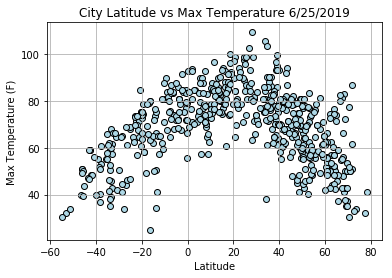

In [8]:
plt.scatter(df["Lat"],df["Max Temp"],facecolors = "lightblue",edgecolor="black")
plt.grid()
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Max Temperature 6/25/2019")
plt.savefig("LatVsMaxTemp.png")

#### Latitude vs. Humidity Plot

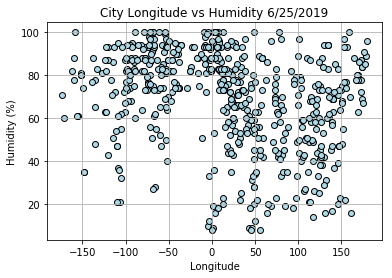

In [9]:
plt.scatter(df["Lng"],df["Humidity"],facecolors = "lightblue",edgecolor="black")
plt.grid()
plt.ylabel("Humidity (%)")
plt.xlabel("Longitude")
plt.title("City Longitude vs Humidity 6/25/2019")
plt.savefig("LngVsHumidity.png")

#### Latitude vs. Cloudiness Plot

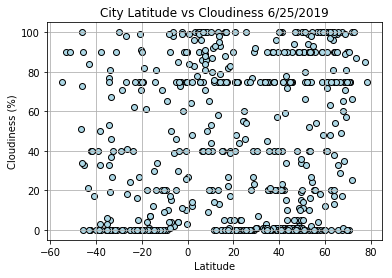

In [10]:
plt.scatter(df["Lat"],df["Cloudiness"],facecolors = "lightblue",edgecolor="black")
plt.grid()
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Cloudiness 6/25/2019")
plt.savefig("LatVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

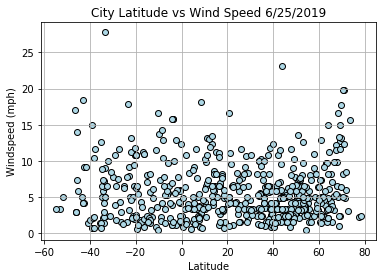

In [11]:
plt.scatter(df["Lat"],df["Wind Speed"],facecolors = "lightblue",edgecolor="black")
plt.grid()
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Wind Speed 6/25/2019")
plt.savefig("LatVsWindSpeed.png")